In [32]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('yandex_tracks_top100.csv')
df.head()

,name,track_len,link,genre,artist(s),chart,Explicit_content,monthly_listens_total,artists_likes_total
0,Царица,3:35,https://music.yandex.ru//album/26605629/track/...,русская поп-музыка,['ANNA ASTI'],1.0,0.0,4847753.0,2120528.0
1,"Плохая Девочка,2:15,https://music.yandex.ru//a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Я плачу,1:54,https://music.yandex.ru//album/26607707/track/...,русская поп-музыка,['A.V.G'],3.0,0.0,4406023.0,287295.0
3,ASPHALT 8,2:15,https://music.yandex.ru//album/25361122/track/...,русский рэп,['MACAN'],4.0,0.0,5149399.0,2359899.0
4,"Где прошла ты,2:48,https://music.yandex.ru//al...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
len(df)

100

In [9]:
# Проверка на дубликаты

duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [name, track_len, link, genre, artist(s), chart, Explicit_content, monthly_listens_total, artists_likes_total]
Index: []


In [10]:
# проверка на отсутствие значений
print(df.isnull().sum())

name                      0
track_len                28
link                     28
genre                    28
artist(s)                28
chart                    28
Explicit_content         28
monthly_listens_total    28
artists_likes_total      28
dtype: int64


In [43]:
# удаляем строки с отсутствующими значениями
df = df.dropna()

In [44]:
# просмотр оставшихся строк
df.head()

,name,track_len,link,genre,artist(s),chart,Explicit_content,monthly_listens_total,artists_likes_total
0,Царица,3:35,https://music.yandex.ru//album/26605629/track/...,русская поп-музыка,['ANNA ASTI'],1.0,0.0,4847753.0,2120528.0
2,Я плачу,1:54,https://music.yandex.ru//album/26607707/track/...,русская поп-музыка,['A.V.G'],3.0,0.0,4406023.0,287295.0
3,ASPHALT 8,2:15,https://music.yandex.ru//album/25361122/track/...,русский рэп,['MACAN'],4.0,0.0,5149399.0,2359899.0
8,Чёрный Русский,2:20,https://music.yandex.ru//album/27253115/track/...,русский рэп,['MORGENSHTERN'],9.0,1.0,2857140.0,4296461.0
9,Танцы,2:58,https://music.yandex.ru//album/26499893/track/...,русская поп-музыка,['NLO'],10.0,0.0,3332520.0,243825.0


In [5]:
# просмотр количества оставшихся строк
len(df)

100

In [6]:
print('среднее значение количества прослушиваний за месяц')
df['monthly_listens_total'].mean()


среднее значение количества прослушиваний за месяц


np.float64(3266437.263888889)

In [7]:
print('медиана количества прослушиваний за месяц')
df['monthly_listens_total'].median()

медиана количества прослушиваний за месяц


np.float64(3246688.0)

Точечный график зависимости лайков от чартов


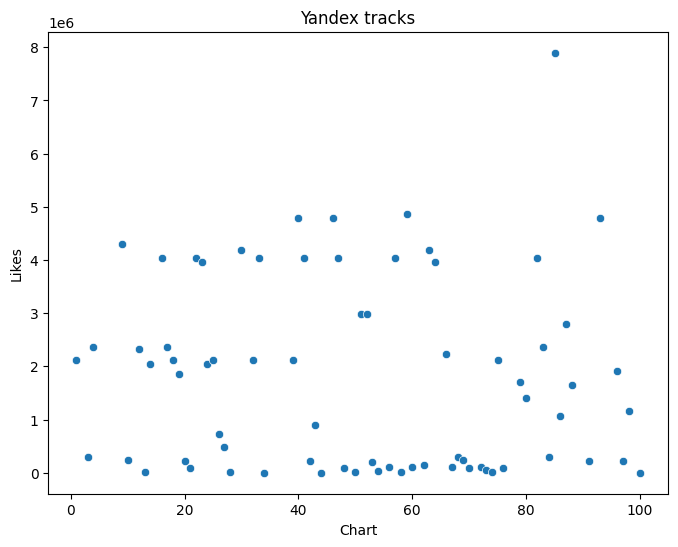

In [8]:
print('Точечный график зависимости лайков от чартов')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='chart', y='artists_likes_total')
plt.xlabel('Chart')
plt.ylabel('Likes')
plt.title('Yandex tracks')
plt.show()

Точечный график зависимости лайков от прослушиваний


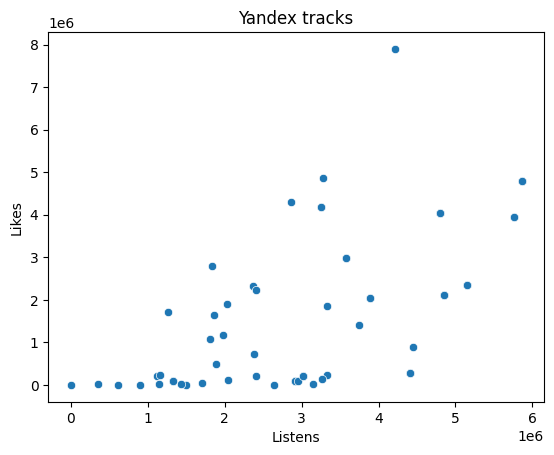

In [14]:
print('Точечный график зависимости лайков от прослушиваний')
sns.scatterplot(data=df, x='monthly_listens_total', y='artists_likes_total')
plt.xlabel('Listens')
plt.ylabel('Likes')
plt.title('Yandex tracks')
plt.show()

Точечный график зависимости прослушиваний в месяц от чартов


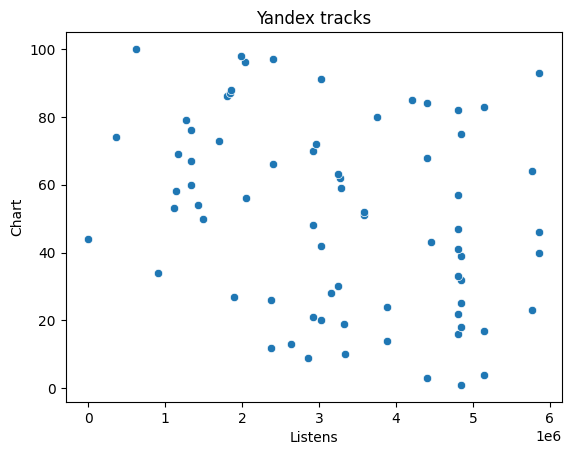

In [10]:
print('Точечный график зависимости прослушиваний в месяц от чартов')
sns.scatterplot(data=df, x='monthly_listens_total', y='chart')
plt.xlabel('Listens')
plt.ylabel('Chart')
plt.title('Yandex tracks')
plt.show()

C:\Users\Alina\AppData\Local\Temp\ipykernel_31448\3613170706.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis', legend=False)


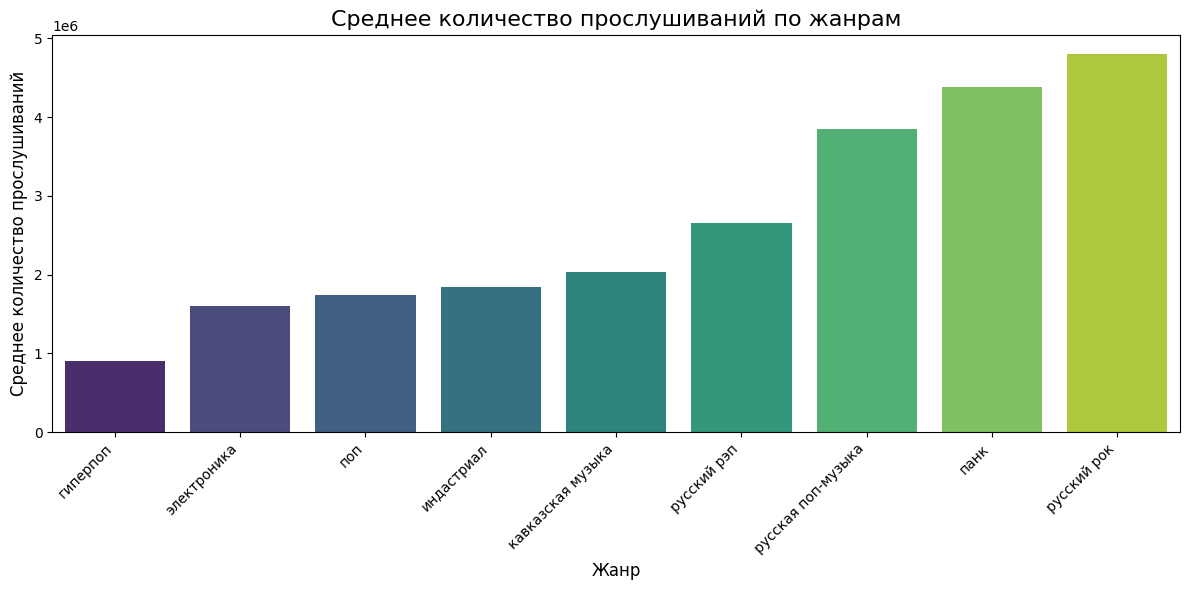

In [11]:
# Группировка данных по жанрам с вычислением среднего числа прослушиваний
genre_popularity = df.groupby('genre')['monthly_listens_total'].mean().sort_values()

# Построение гистограммы
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis', legend=False)
plt.title('Среднее количество прослушиваний по жанрам', fontsize=16)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Среднее количество прослушиваний', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Гистограмма прослушиваний


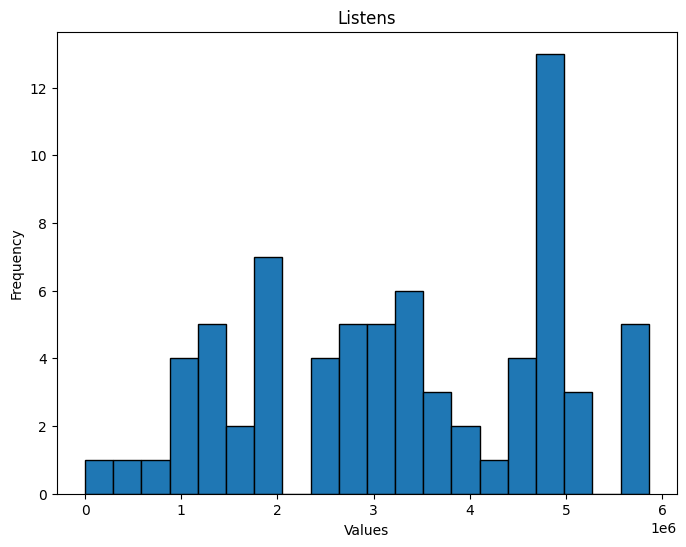

In [12]:
print('Гистограмма прослушиваний')
plt.figure(figsize=(8, 6))
plt.hist(df['monthly_listens_total'], bins=20, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Listens')
plt.show()

В результате анализа было выявлено:
1. Треки с более высокими позициями в чарте имеют больше ежемесячных прослушиваний.
2. Определенные жанры имеют значительно большее среднее число прослушиваний. Это может указывать на их популярность среди слушателей.
3. При увеличении количества прослушиваний, увеличивается количество лайков. 